In [1]:
# Import Reuired Librarie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
data = pd.read_csv('/content/cleveland.csv')

In [3]:
# View the dataset
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [4]:
# Check Dataset information like columns, NULL count, dtype
print("Basic Information:")
print(data.info())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB
None


In [5]:
# Convert object columns to numeric, coercing errors to NaN
for col in ['ca', 'thal']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [6]:
# Check NULL or NaN values
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [7]:
# Drop Columns with NULL values
data.dropna(inplace=True)

In [8]:
# Define mappings for each column where applicable

# Mapping values for the 'num' column (Heart Disease Diagnosis)
num_mapping = {0: 'No Heart Disease',1: 'Mild Heart Disease',2: 'Moderate Heart Disease',3: 'Severe Heart Disease',
               4: 'Very Severe Heart Disease'}

# For 'sex' column (Gender)
sex_mapping = {0: 'Female',1: 'Male'}

# For 'cp' column (Chest pain type)
cp_mapping = {1: 'Typical Angina',2: 'Atypical Angina',3: 'Non-anginal Pain',4: 'Asymptomatic'}

# For 'fbs' column (Fasting blood sugar > 120 mg/dL)
fbs_mapping = {0: 'No',1: 'Yes'}

# For 'restecg' column (Resting Electrocardiographic Results)
restecg_mapping = {0: 'Normal',1: 'ST-T Wave Abnormality',2: 'Left Ventricular Hypertrophy'}

# For 'exang' column (Exercise-induced angina)
exang_mapping = {0: 'No',1: 'Yes'}

# For 'slope' column (Slope of the peak exercise ST segment)
slope_mapping = {1: 'Upsloping',2: 'Flat',3: 'Downsloping'}

# For 'ca' column (Number of major vessels colored by fluoroscopy)
ca_mapping = {0: '0 Vessels',1: '1 Vessel',2: '2 Vessels',3: '3 Vessels'}

# For 'thal' column (Thalassemia)
thal_mapping = {3: 'Normal',6: 'Fixed Defect',7: 'Reversible Defect'}

# Apply all mappings
data['sex'] = data['sex'].replace(sex_mapping)
data['cp'] = data['cp'].replace(cp_mapping)
data['fbs'] = data['fbs'].replace(fbs_mapping)
data['restecg'] = data['restecg'].replace(restecg_mapping)
data['exang'] = data['exang'].replace(exang_mapping)
data['slope'] = data['slope'].replace(slope_mapping)
data['ca'] = data['ca'].replace(ca_mapping)
data['thal'] = data['thal'].replace(thal_mapping)
data['new_num'] = data['num'].replace(num_mapping)

# Display the first few rows to confirm changes
data[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal','new_num']].head()


,sex,cp,fbs,restecg,exang,slope,ca,thal,new_num
0,Male,Typical Angina,Yes,Left Ventricular Hypertrophy,No,Downsloping,0 Vessels,Fixed Defect,No Heart Disease
1,Male,Asymptomatic,No,Left Ventricular Hypertrophy,Yes,Flat,3 Vessels,Normal,Moderate Heart Disease
2,Male,Asymptomatic,No,Left Ventricular Hypertrophy,Yes,Flat,2 Vessels,Reversible Defect,Mild Heart Disease
3,Male,Non-anginal Pain,No,Normal,No,Downsloping,0 Vessels,Normal,No Heart Disease
4,Female,Atypical Angina,No,Left Ventricular Hypertrophy,No,Upsloping,0 Vessels,Normal,No Heart Disease


In [9]:
# Statistical Summary
print("\nStatistical Summary:")
print(data.describe())


Statistical Summary:
              age    trestbps        chol     thalach     oldpeak         num
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000
mean    54.542088  131.693603  247.350168  149.599327    1.055556    0.946128
std      9.049736   17.762806   51.997583   22.941562    1.166123    1.234551
min     29.000000   94.000000  126.000000   71.000000    0.000000    0.000000
25%     48.000000  120.000000  211.000000  133.000000    0.000000    0.000000
50%     56.000000  130.000000  243.000000  153.000000    0.800000    0.000000
75%     61.000000  140.000000  276.000000  166.000000    1.600000    2.000000
max     77.000000  200.000000  564.000000  202.000000    6.200000    4.000000


### EDA: Visualizing the data

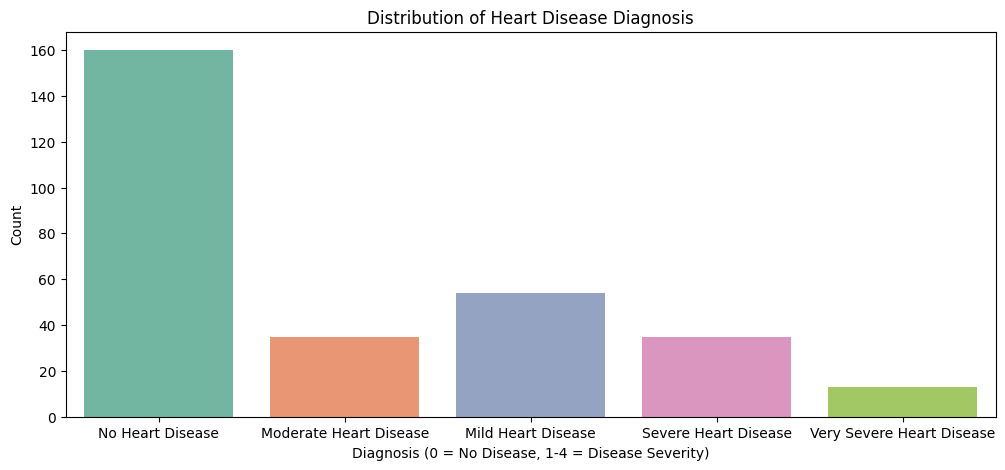

In [10]:
# 1. Distribution of the target variable (Heart Disease Diagnosis)
plt.figure(figsize=(12, 5))
sns.countplot(x="new_num", data=data, palette="Set2")
plt.title("Distribution of Heart Disease Diagnosis")
plt.xlabel("Diagnosis (0 = No Disease, 1-4 = Disease Severity)")
plt.ylabel("Count")
plt.show()

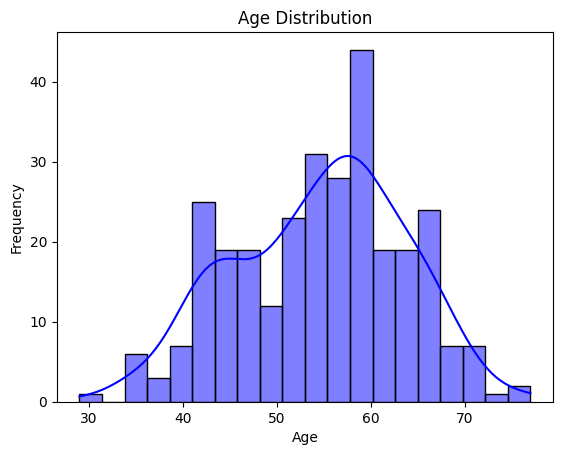

In [11]:
# 2. Age Distribution
sns.histplot(data["age"], kde=True, bins=20, color="blue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


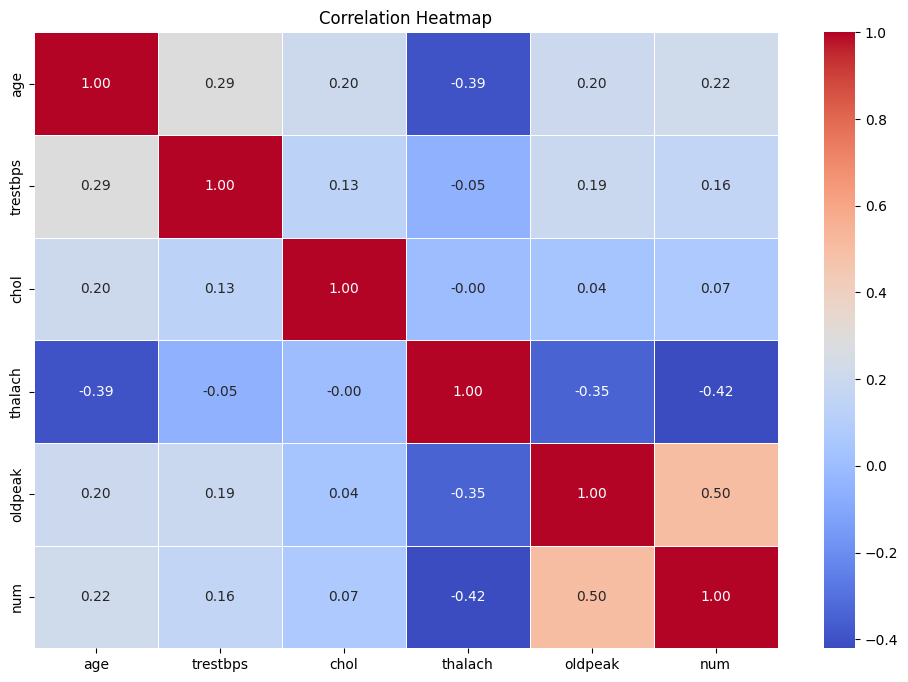

In [12]:
# 3. Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.select_dtypes(include=np.number).corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

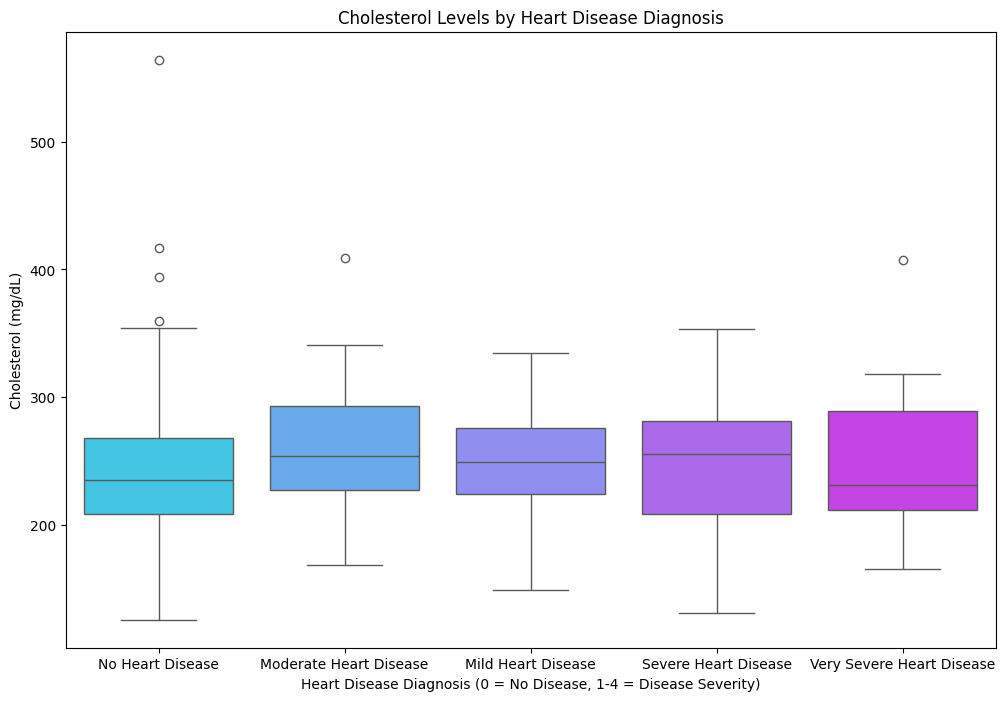

In [13]:
# 4. Boxplot of cholesterol by heart disease diagnosis
plt.figure(figsize=(12, 8))
sns.boxplot(x="new_num", y="chol", data=data, palette="cool")
plt.title("Cholesterol Levels by Heart Disease Diagnosis")
plt.xlabel("Heart Disease Diagnosis (0 = No Disease, 1-4 = Disease Severity)")
plt.ylabel("Cholesterol (mg/dL)")
plt.show()

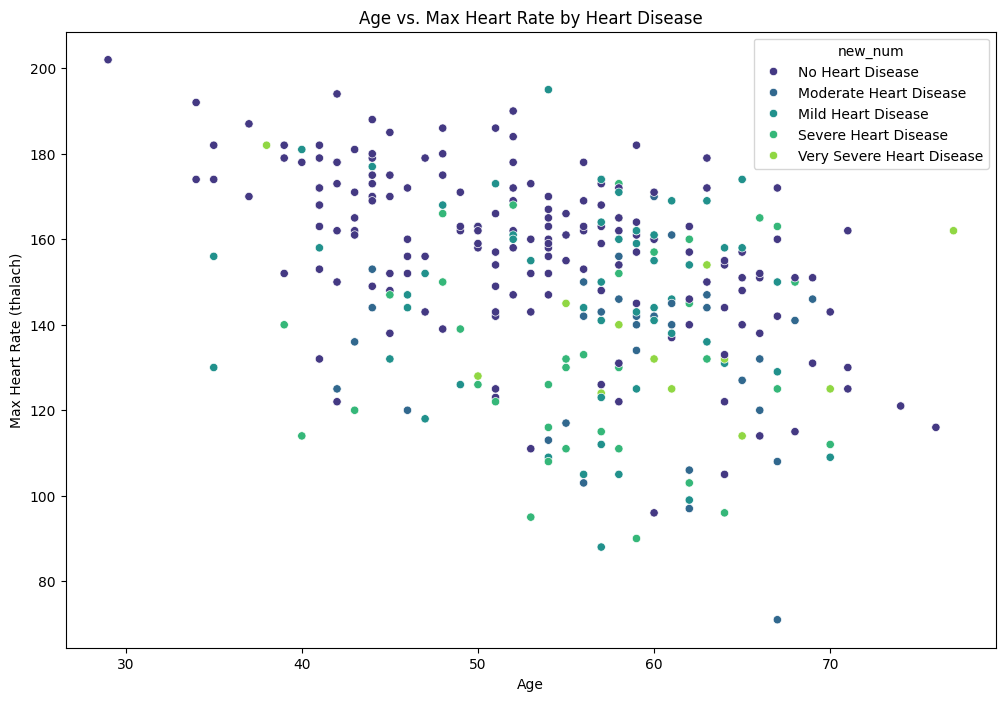

In [14]:
# 5. Scatterplot of age vs. max heart rate achieved (thalach), colored by heart disease
plt.figure(figsize=(12, 8))
sns.scatterplot(x="age", y="thalach", hue="new_num", data=data, palette="viridis")
plt.title("Age vs. Max Heart Rate by Heart Disease")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate (thalach)")
plt.show()

### Key Insights

1. Problem: Risk Factors Correlation with Heart Disease

Correlation with Heart Disease Diagnosis:
num         1.000000
oldpeak     0.501461
age         0.222156
trestbps    0.159620
chol        0.066448
thalach    -0.420639
Name: num, dtype: float64


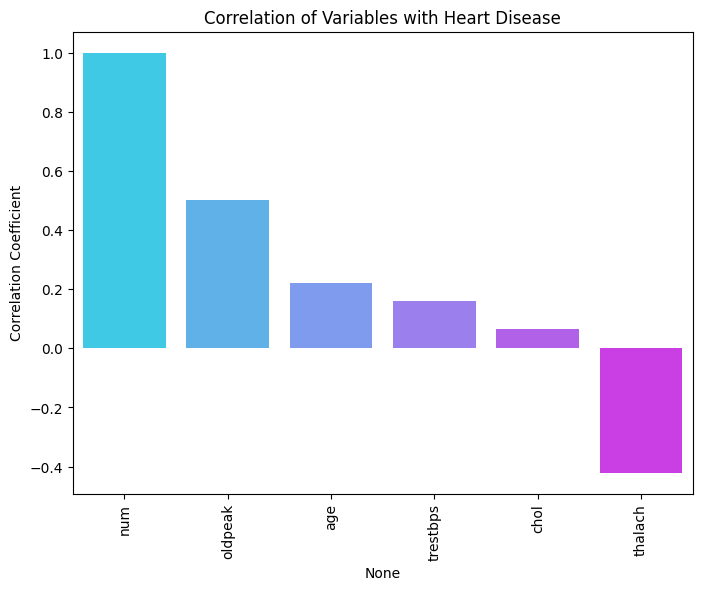

In [15]:
# Which variables are most strongly associated with heart disease?

# Correlation with the target variable
correlation = data.select_dtypes(include=np.number).corr()["num"].sort_values(ascending=False)
print("Correlation with Heart Disease Diagnosis:")
print(correlation)

# Visualize correlation
plt.figure(figsize=(8, 6))
sns.barplot(x=correlation.index, y=correlation.values, palette="cool")
plt.title("Correlation of Variables with Heart Disease")
plt.xticks(rotation=90)
plt.ylabel("Correlation Coefficient")
plt.show()

2. Problem: Age and Heart Disease Trends

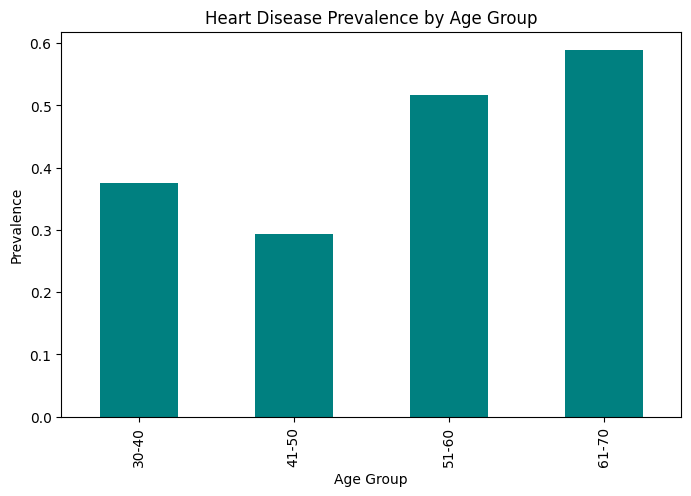

In [16]:
# How does the likelihood of heart disease vary across different age groups?

# Age groups
data["age_group"] = pd.cut(data["age"], bins=[29, 40, 50, 60, 70], labels=["30-40", "41-50", "51-60", "61-70"])

# Heart disease prevalence by age group
age_prevalence = data.groupby("age_group")["num"].apply(lambda x: (x > 0).mean())

# Visualize
age_prevalence.plot(kind="bar", color="teal", figsize=(8, 5))
plt.title("Heart Disease Prevalence by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Prevalence")
plt.show()

3. Problem: Gender Disparity in Heart Disease

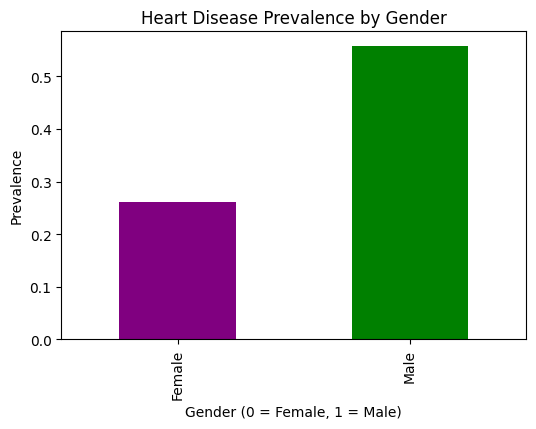

In [17]:
# Is there a difference in heart disease prevalence between males and females?

# Prevalence by gender
gender_prevalence = data.groupby("sex")["num"].apply(lambda x: (x > 0).mean())

# Visualize
gender_prevalence.plot(kind="bar", color=["purple", "green"], figsize=(6, 4))
plt.title("Heart Disease Prevalence by Gender")
plt.xlabel("Gender (0 = Female, 1 = Male)")
plt.ylabel("Prevalence")
plt.show()

4. Problem: Cholesterol Levels and Heart Disease

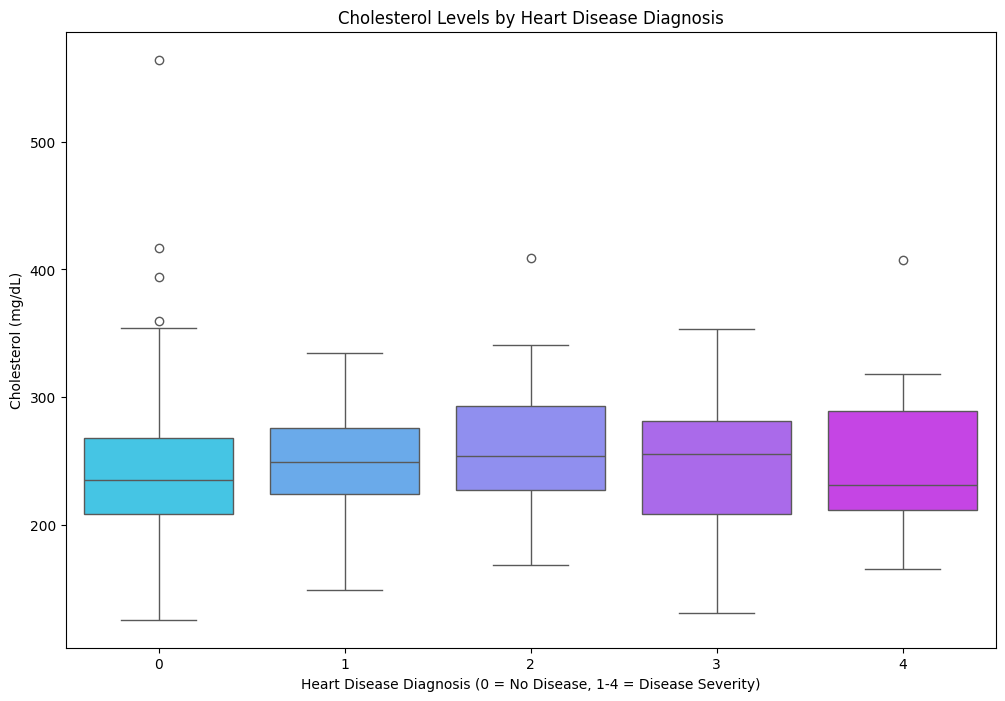

In [18]:
# How do cholesterol levels vary between patients with and without heart disease?

# Boxplot for cholesterol
plt.figure(figsize=(12, 8))
sns.boxplot(x="num", y="chol", data=data, palette="cool")
plt.title("Cholesterol Levels by Heart Disease Diagnosis")
plt.xlabel("Heart Disease Diagnosis (0 = No Disease, 1-4 = Disease Severity)")
plt.ylabel("Cholesterol (mg/dL)")
plt.show()

5. Problem: Chest Pain Type and Heart Disease

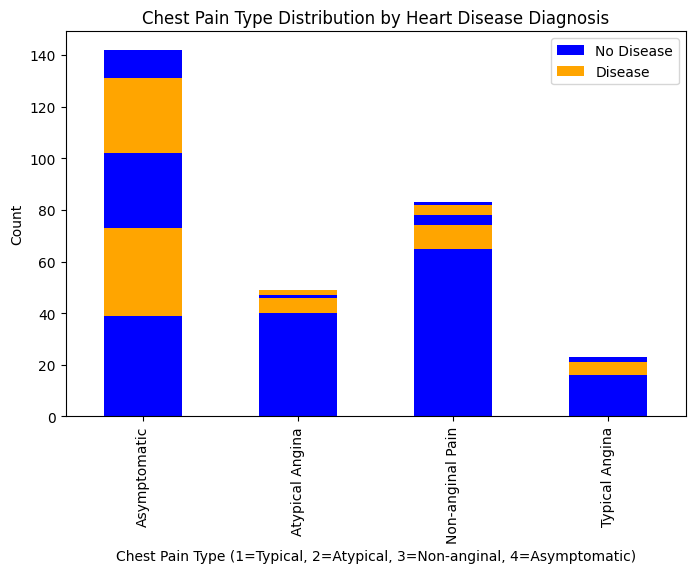

In [19]:
# What is the distribution of chest pain types among patients with and without heart disease?

# Group by chest pain type and heart disease
cp_distribution = data.groupby(["cp", "num"]).size().unstack()

# Visualize
cp_distribution.plot(kind="bar", stacked=True, figsize=(8, 5), color=["blue", "orange"])
plt.title("Chest Pain Type Distribution by Heart Disease Diagnosis")
plt.xlabel("Chest Pain Type (1=Typical, 2=Atypical, 3=Non-anginal, 4=Asymptomatic)")
plt.ylabel("Count")
plt.legend(["No Disease", "Disease"])
plt.show()


6. Problem: Exercise-Induced Angina and Heart Disease

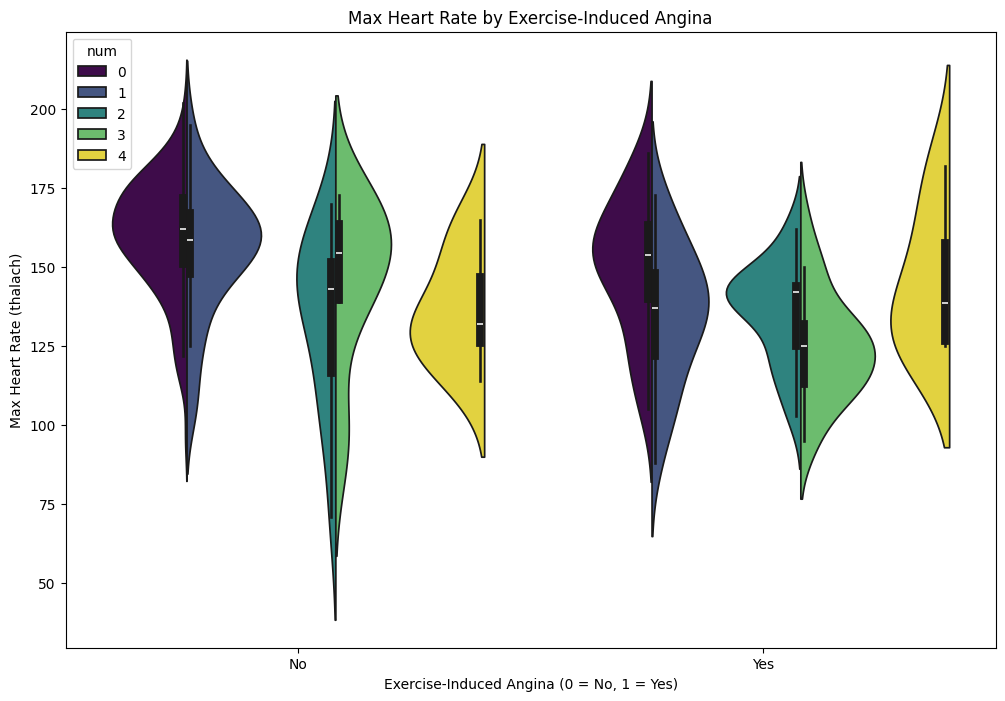

In [20]:
# How does exercise-induced angina affect maximum heart rate?

# Violin plot for max heart rate by exercise-induced angina
plt.figure(figsize=(12, 8))
sns.violinplot(x="exang", y="thalach", hue="num", data=data, split=True, palette="viridis")
plt.title("Max Heart Rate by Exercise-Induced Angina")
plt.xlabel("Exercise-Induced Angina (0 = No, 1 = Yes)")
plt.ylabel("Max Heart Rate (thalach)")
plt.show()

7. Problem: Relationship Between Resting Blood Pressure and Heart Disease

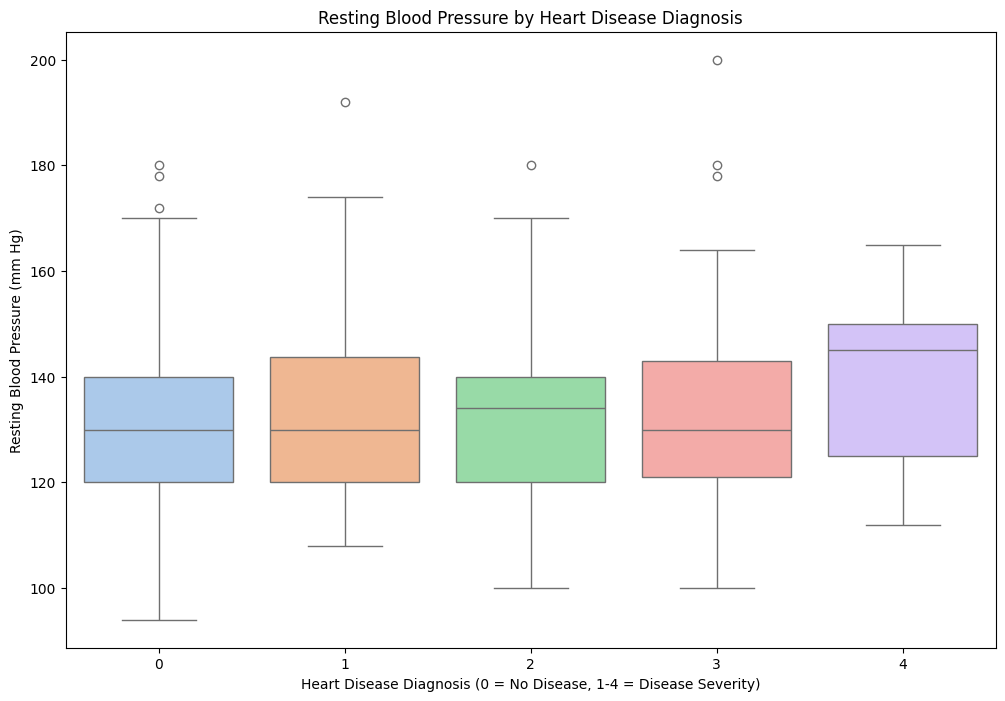

In [21]:
# How does resting blood pressure vary among patients with heart disease?

# Boxplot for resting blood pressure
plt.figure(figsize=(12, 8))
sns.boxplot(x="num", y="trestbps", data=data, palette="pastel")
plt.title("Resting Blood Pressure by Heart Disease Diagnosis")
plt.xlabel("Heart Disease Diagnosis (0 = No Disease, 1-4 = Disease Severity)")
plt.ylabel("Resting Blood Pressure (mm Hg)")
plt.show()

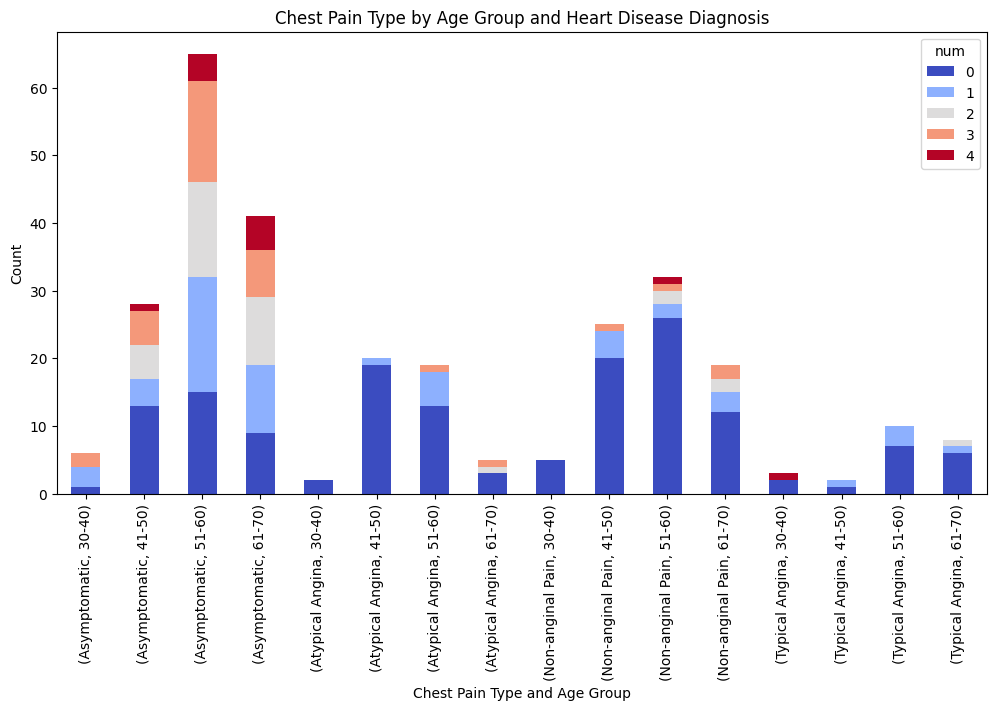

In [22]:
# Combining chest pain type, age group, and heart disease
cp_age = data.groupby(["cp", "age_group", "num"]).size().unstack().fillna(0)

cp_age.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="coolwarm")
plt.title("Chest Pain Type by Age Group and Heart Disease Diagnosis")
plt.xlabel("Chest Pain Type and Age Group")
plt.ylabel("Count")
plt.show()

# Regression analysis table

In [25]:
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

# Convert categorical variables into numerical using Label Encoding
label_encoders = {}
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# Define independent variables (features) and the dependent variable (target)
X = data[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = data['num']

# Add a constant to the independent variable to represent the intercept
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.MNLogit(y, X)
result = model.fit()

# Print the regression table
print(result.summary())

# Evaluate Model Fit using Pseudo R-squared
print(f"\nMcFadden's Pseudo R-squared: {result.prsquared:.4f}")

Optimization terminated successfully.
         Current function value: 0.808547
         Iterations 8
                          MNLogit Regression Results                          
Dep. Variable:                    num   No. Observations:                  297
Model:                        MNLogit   Df Residuals:                      241
Method:                           MLE   Df Model:                           52
Date:                Thu, 19 Dec 2024   Pseudo R-squ.:                  0.3704
Time:                        10:05:46   Log-Likelihood:                -240.14
converged:                       True   LL-Null:                       -381.39
Covariance Type:            nonrobust   LLR p-value:                 1.992e-33
     num=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2821      2.850     -1.152      0.249      -8.867       2.303
age           -0.0065      0.